<a href="https://colab.research.google.com/github/AAKANKSHA123-123/AAKANKSHA123-123/blob/main/replacing_vgg_with_RESnetnovcode_batch_size64.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction and data collection**

In [1]:
#importing packages
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import json
from google.colab import drive

In [2]:
import tensorflow as tf

# We'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
#import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np
import pandas as pd
import os
import time
import json
import collections
import operator
from glob import glob
from PIL import Image
import pickle
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from tensorflow import reshape
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Embedding, LSTM, Activation,ZeroPadding1D,Conv1D

print("Done imports")

Done imports


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

**Mounting drive for saving data**

In [4]:
drive.mount('/content/drive/', force_remount=True) #mouting the drive

Mounted at /content/drive/


**Downloading COCO images**

**Downloading VQA Questions**

In [5]:
annotation_zip = tf.keras.utils.get_file('captions.zip',cache_subdir=os.path.abspath('.'),origin = 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip',extract = True)

annotation_file = os.path.dirname(annotation_zip)+'/annotations/captions_train2014.json'

name_of_zip = 'train2014.zip'
if not os.path.exists(os.path.abspath('.')+'/' + name_of_zip):
  image_zip = tf.keras.utils.get_file(name_of_zip,cache_subdir=os.path.abspath('.'),origin='http://images.cocodataset.org/zips/train2014.zip',extract=True)
  PATH = os.path.dirname(image_zip)+'/train2014'
else:
  PATH = os.path.abspath('.')+'/train2014'  

13510582272/13510573713 [==============================] - 181s 0us/step


In [6]:
print(PATH)
#!wget https://s3.amazonaws.com/cvmlp/vqs/mscoco/vqa/v2_Questions_Train_mscoco.zip
#!unzip -a v2_Questions_Train_mscoco.zip
!wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Train_mscoco.zip
!unzip -a v2_Annotations_Train_mscoco.zip
!wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Train_mscoco.zip
!unzip -a v2_Questions_Train_mscoco.zip

/content/train2014
--2022-05-24 04:29:34--  https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Train_mscoco.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.41.230
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.41.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21708861 (21M) [application/zip]
Saving to: ‘v2_Annotations_Train_mscoco.zip’

v2_Annotations_Trai 100%[===================>]  20.70M  32.9MB/s    in 0.6s    

2022-05-24 04:29:35 (32.9 MB/s) - ‘v2_Annotations_Train_mscoco.zip’ saved [21708861/21708861]

Archive:  v2_Annotations_Train_mscoco.zip
  inflating: v2_mscoco_train2014_annotations.json  [text]  
--2022-05-24 04:29:38--  https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Train_mscoco.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.41.230
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.41.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7239401 (6.9M) [ap

In [7]:
# read the json file
question_file_path = 'v2_OpenEnded_mscoco_train2014_questions.json'
with open(question_file_path, 'r') as f:
    questions = json.load(f)

print("Total Number Questions is : ",len(questions['questions']))

Total Number Questions is :  443757


**Added code from separate image model**

In [8]:
#Storing the captions and image file name in vectors
import collections
import operator

annotation_file = 'v2_mscoco_train2014_annotations.json'

with open(annotation_file,'r') as f:
  annotations = json.load(f)



all_answers = []
all_answers_qids = []
all_img_name_vector = []

for annot in annotations['annotations']:
  #print(annot)
  ans_dic = collections.defaultdict(int)
  for each in annot['answers']:
    diffans = each['answer']
    if diffans in ans_dic:
      #print(each['answer_confidence'])
      if each['answer_confidence']=='yes':
        ans_dic[diffans]+=4
      if each['answer_confidence']=='maybe':
        ans_dic[diffans]+=2
      if each['answer_confidence']=='no':
        ans_dic[diffans]+=1
    else:
      if each['answer_confidence']=='yes':
        ans_dic[diffans]+=4
      if each['answer_confidence']=='maybe':
        ans_dic[diffans]+=2
      if each['answer_confidence']=='no':
        ans_dic[diffans]+=1

  #print(ans_dic)
  most_fav = max(ans_dic.items(),key=operator.itemgetter(1))[0]
  #print(most_fav)
  caption = '<start>' + most_fav + '<end>'  #each['answer']

  image_id = annot['image_id']
  question_id = annot['question_id']
  full_coco_image_path = PATH  + '/COCO_train2014_' + '%012d.jpg' %(image_id)

  all_img_name_vector.append(full_coco_image_path)
  all_answers.append(caption)
  all_answers_qids.append(question_id)










In [9]:
all_questions = []
question_ids = []
all_img_name_vector_2 = []


for annot in questions['questions']:
  caption = '<start>' + annot['question'] + '<end>'
  image_id = annot['image_id']
  full_coco_image_path = PATH + '/COCO_train2014_' + '%012d.jpg' %(image_id)
  
  all_img_name_vector_2.append(full_coco_image_path)
  all_questions.append(caption)
  #print(all_questions)
  question_ids.append(annot['question_id'])

In [10]:
print(questions['questions'][np.random.randint(0,443757)])#new ms coco code

{'image_id': 269213, 'question': 'Are there any animals in the water?', 'question_id': 269213001}


In [11]:
#Taken from separate image model
print(len(all_img_name_vector),len(all_answers),len(all_answers_qids))
print(all_img_name_vector[10:15],all_answers[10:15],all_answers_qids[10:15])
print(len(all_img_name_vector_2),len(all_questions),len(question_ids))
print(all_img_name_vector_2[10:15],all_questions[10:15],question_ids[10:15])

443757 443757 443757
['/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393223.jpg', '/content/train2014/COCO_train2014_000000393223.jpg'] ['<start>yes<end>', '<start>yes<end>', '<start>contrail<end>', '<start>yes<end>', '<start>white and purple<end>'] [393221000, 393221001, 393221002, 393223000, 393223001]
443757 443757 443757
['/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393223.jpg', '/content/train2014/COCO_train2014_000000393223.jpg'] ['<start>Is the sky blue?<end>', '<start>Is there snow on the mountains?<end>', '<start>What is the white streak?<end>', '<start>Is the window open?<end>', '<start>What color is the toothbrush?<end>'] [393221000, 393221001, 393221002, 393223000, 

**Shuffling all questions and answers(taken from separate image model)**

In [12]:
train_answers,train_questions,img_name_vector = shuffle(all_answers,all_questions,all_img_name_vector,random_state=1)
#train_answers,train_questions,img_name_vector = (all_answers,all_questions,all_img_name_vector)
num_examples=50

train_answers = train_answers[:num_examples]
train_questions = train_questions[:num_examples]
img_name_vector =img_name_vector[:num_examples]

print(img_name_vector[0],train_questions[0],train_answers[0])
print(len(img_name_vector),len(train_questions),len(train_answers))

/content/train2014/COCO_train2014_000000573744.jpg <start>Is this a happy animal?<end> <start>yes<end>
50 50 50


**Downloading VQA Annotations**

In [13]:
annotation_file_path = 'v2_mscoco_train2014_annotations.json'
with open(annotation_file_path, 'r') as f:
    annotations = json.load(f)

In [14]:
annotations['annotations'][np.random.randint(0,443757)]

{'answer_type': 'number',
 'answers': [{'answer': '4', 'answer_confidence': 'yes', 'answer_id': 1},
  {'answer': '5', 'answer_confidence': 'maybe', 'answer_id': 2},
  {'answer': '5', 'answer_confidence': 'yes', 'answer_id': 3},
  {'answer': '5', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': '5', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': '5', 'answer_confidence': 'yes', 'answer_id': 6},
  {'answer': '5', 'answer_confidence': 'yes', 'answer_id': 7},
  {'answer': '5', 'answer_confidence': 'maybe', 'answer_id': 8},
  {'answer': '5', 'answer_confidence': 'yes', 'answer_id': 9},
  {'answer': '5', 'answer_confidence': 'yes', 'answer_id': 10}],
 'image_id': 315314,
 'multiple_choice_answer': '5',
 'question_id': 315314001,
 'question_type': 'how many'}

In [15]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


**Data preprocessing**


In [16]:
#importing packages
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import json
import seaborn as sns
import tensorflow as tf

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud
from google.colab import drive

Populating the interactive namespace from numpy and matplotlib


**Variables**

**DATA TRANSFORMATION**
LOADING QUESTIONS AND ANSWERS

In [17]:
with open(question_file_path, 'r') as f:
    questions = json.load(f)
    questions = questions["questions"]

with open(annotation_file_path, 'r') as f:
    annotations = json.load(f)
    annotations = annotations["annotations"]

In [18]:
print("Total Number Questions is : ",len(questions))

Total Number Questions is :  443757


In [19]:
questions_df = pd.DataFrame(questions).sample(n=250000)
#questions_df = pd.DataFrame(questions)
#ques_samp = questions_df.sample(n=100)
#ques_samp.head(5)

questions_df.head(5)

,image_id,question,question_id
94167,26576,What colors is the man wearing?,26576000
379666,373316,What is unusual about this hot dog?,373316003
320500,151486,What color is the person's shirt?,151486001
425976,125693,How many kites are in the image?,125693000
284955,213241,What color is the frosting on the cake?,213241002


In [20]:
annotations_df = pd.DataFrame(annotations).sample(n=250000)
#annotations_df = pd.DataFrame(annotations)
#annot_samp = annotations_df.sample(n=100)
#annot_samp.head(5)
annotations_df.head(5)
print(len(annotations_df))

250000


**MERGING QUESTIONS AND ANNOTATIONS**

In [21]:
data = pd.merge(questions_df,annotations_df,  how='inner', left_on=['image_id','question_id'], right_on = ['image_id','question_id'])
#data_samp = pd.merge(ques_samp,annot_samp,  how='inner', left_on=['image_id','question_id'], right_on = ['image_id','question_id'])
print(len(data))


140844


In [22]:
data.head(5)
#data_samp.head(5)

,image_id,question,question_id,question_type,multiple_choice_answer,answers,answer_type
0,151486,What color is the person's shirt?,151486001,what color is the,blue,"[{'answer': 'blue', 'answer_confidence': 'yes'...",other
1,125693,How many kites are in the image?,125693000,how many,5,"[{'answer': '4', 'answer_confidence': 'yes', '...",number
2,560481,How many stripes are on the guys shorts?,560481001,how many,0,"[{'answer': '2', 'answer_confidence': 'maybe',...",number
3,430686,What are the bikes called that are in back of ...,430686014,what are the,bicycle,"[{'answer': 'bicycle', 'answer_confidence': 'y...",other
4,106459,Is there a mantel in the picture?,106459009,is there a,no,"[{'answer': 'no', 'answer_confidence': 'yes', ...",yes/no


In [23]:
#currentDirectory = "/content/drive/My Drive/pcase_study_2/"
#os.chdir(currentDirectory)
#currentDirectory = ""
#dataDirectory = currentDirectory + "data/"
#imageDirectory = dataDirectory + "train2014/"
imageDirectory = '/content/train2014'
#question_file_path = dataDirectory + 'v2_OpenEnded_mscoco_train2014_questions.json'
question_file_path = '/content/v2_OpenEnded_mscoco_train2014_questions.json'
#annotation_file_path = dataDirectory + 'v2_mscoco_train2014_annotations.json'
annotation_file_path = '/content/v2_mscoco_train2014_annotations.json'

In [24]:
imageDirectory = '/content/train2014'
os.chdir(imageDirectory)
imageDirectory = ""

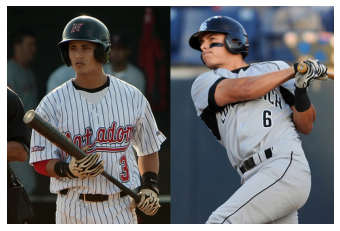

**************************************************
Question :  Is the man wearing sunglasses?
**************************************************
Answer :  no
(333, 500, 3)


In [25]:
index = np.random.randint(0,len(data))#263115

img_path =  imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (data['image_id'][index])
img=mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()
print("*"*50)
print("Question : " ,data['question'][index])
print("*"*50)
print("Answer : ", data['multiple_choice_answer'][index])

print(img.shape)

**IMAGES**

       image_id  question
0             9         1
1            25         6
2            30         2
3            36         1
4            49         1
...         ...       ...
65151    581900         2
65152    581903         1
65153    581904         3
65154    581906         1
65155    581909         1

[65156 rows x 2 columns]
65156
Max number of questions on a image 88
Min number of questions on a image 1
Mean of questions on a image 2.1616428264472956


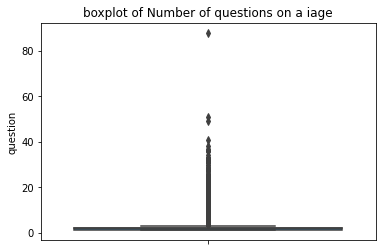

In [26]:
aggregations = {'question': 'count'}
temp = pd.DataFrame(data.groupby(['image_id'],as_index=False).agg(aggregations))
#temp.set_index('image_id', inplace=True)

print(temp)
print(len(temp))
num_of_ques_in_image = temp['question'].values
print("Max number of questions on a image",max(num_of_ques_in_image))
print("Min number of questions on a image",min(num_of_ques_in_image))
print("Mean of questions on a image",np.mean(num_of_ques_in_image))

ax = sns.boxplot(y = 'question', data = temp) 
plt.title("boxplot of Number of questions on a iage")
plt.show()

**IMAGES THAT HAVE MAXIMUM NUMBER OF QUESTIONS**

**Duplicate questions on same image**

In [27]:
aggregations = {'question_id':'count', 'multiple_choice_answer': lambda x: " || ".join(x)}
temp = pd.DataFrame(data.groupby(['image_id','question'],as_index=False).agg(aggregations)).rename(columns={'question_id':'count'})
temp = temp[temp['count']>1]
temp

,image_id,question,count,multiple_choice_answer
668,3008,What color is the woman's hair?,2,brown || brown
3886,16414,What color is the parking meter?,2,black and yellow || black
33290,137275,Is the window open?,2,yes || yes
41397,170937,How many rolls are in this photo?,2,2 || 2
57488,238255,Is the kid falling?,2,no || no
91524,378068,What color is the shirt?,2,black || black
101604,419387,What color is the trash can?,2,blue || blue
111286,458603,Are the elephants thirsty?,2,yes || yes
116823,481506,Is the beach crowded?,2,yes || yes


**Question type**

In [28]:
data.question_type.unique()

array(['what color is the', 'how many', 'what are the', 'is there a',
       'what is the color of the', 'is this', 'what is the',
       'what sport is', 'is the woman', 'what are', 'what does the',
       'which', 'is it', 'what color is', 'what is the man',
       'what kind of', 'what animal is', 'what', 'does the', 'why',
       'does this', 'are the', 'what room is', 'what color',
       'what type of', 'what color are the', 'is the', 'is the man',
       'is this a', 'are there', 'are they', 'what is this',
       'what is the woman', 'what is', 'do you', 'are there any',
       'is there', 'what is in the', 'why is the', 'where is the',
       'who is', 'are these', 'how many people are', 'can you',
       'none of the above', 'how', 'what is the person', 'is', 'was',
       'what is on the', 'has', 'is this person', 'where are the',
       'could', 'what brand', 'are', 'do', 'what number is', 'is that a',
       'what is the name', 'how many people are in', 'is he', 'what time

In [29]:
print("Number of unique Question type in dataset : ",len(data.question_type.unique()))

Number of unique Question type in dataset :  65


In [30]:
def getFrequnctDict(data,column,isJoin=False):
    column_frequency = {}

    for _row in data[column]:
        if isJoin:
            _row = "_".join(_row.split())
        if(column_frequency.get(_row,-1) > 0):
            column_frequency[_row] += 1
        else:
            column_frequency[_row] = 1

    return column_frequency

def lineChart(data,column,top=20,isJoin=False):
    column_frequncy = getFrequnctDict(data,column,isJoin)
    sort_column_frequncy = sorted(list(column_frequncy.items()),key = lambda x: x[1],reverse=True)
    total_samples =  len(data)

    plt.plot([x[1]for x in sort_column_frequncy[:top]])
    i=np.arange(top)
    plt.title("Frequency of top " + str(top) + " " + column )
    plt.xlabel("Tags")
    plt.ylabel("Counts")
    plt.xticks(i,[x[0] for x in sort_column_frequncy[:top]])
    plt.xticks(rotation=90)
    plt.show()
    return sort_column_frequncy

def plotWordCloud(data,column,isJoin=False):
    column_frequncy = getFrequnctDict(data,column,isJoin)
    #https://www.geeksforgeeks.org/generating-word-cloud-python/
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = None, 
                    min_font_size = 10).generate_from_frequencies(column_frequncy)
    # plot the WordCloud image     
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("WordCloud on "+ column)  
    plt.show()

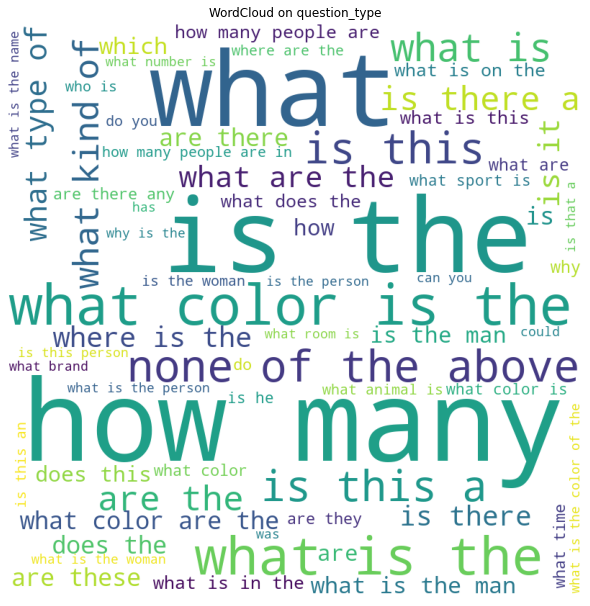

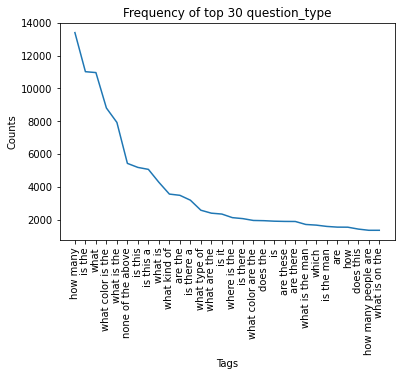

In [31]:
plotWordCloud(data, 'question_type')
question_type_frequncy = lineChart(data, 'question_type', top = 30)

In [32]:
for _type,_count in question_type_frequncy[:10]:
    print("Percentage of '" + _type + "' Type of Questions in Dataset is ", str(100*_count/len(data))) 

Percentage of 'how many' Type of Questions in Dataset is  9.512652296157452
Percentage of 'is the' Type of Questions in Dataset is  7.821419442787765
Percentage of 'what' Type of Questions in Dataset is  7.78236914600551
Percentage of 'what color is the' Type of Questions in Dataset is  6.248757490556928
Percentage of 'what is the' Type of Questions in Dataset is  5.6239527420408395
Percentage of 'none of the above' Type of Questions in Dataset is  3.851069268126438
Percentage of 'is this' Type of Questions in Dataset is  3.6764079407003494
Percentage of 'is this a' Type of Questions in Dataset is  3.5919172985714694
Percentage of 'what is' Type of Questions in Dataset is  3.031723041095112
Percentage of 'what kind of' Type of Questions in Dataset is  2.5219391667376674


**ANSWERS**

In [33]:
data['answer_type'].unique()

array(['other', 'number', 'yes/no'], dtype=object)

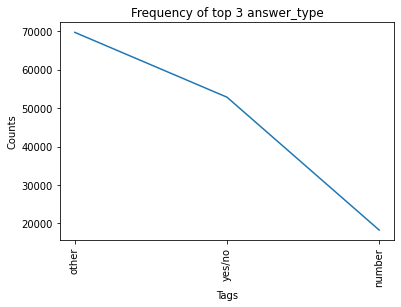

In [34]:
answer_type_frequncy = lineChart(data, 'answer_type', top = 3)

In [35]:
for _type,_count in answer_type_frequncy:
    print("Percentage of '" + _type + "' Type of Answers in Dataset is ", str(100*_count/len(data)) )

Percentage of 'other' Type of Answers in Dataset is  49.50228621737525
Percentage of 'yes/no' Type of Answers in Dataset is  37.52520519155946
Percentage of 'number' Type of Answers in Dataset is  12.972508591065292


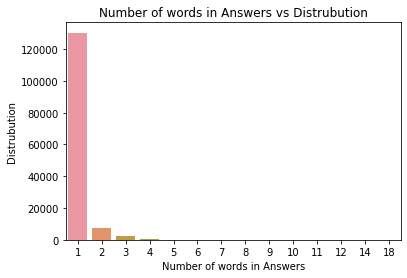

In [36]:
sns.countplot(data["multiple_choice_answer"].apply(lambda x: len(x.split())).values)
plt.title("Number of words in Answers vs Distrubution")
plt.xlabel("Number of words in Answers")
plt.ylabel("Distrubution")
plt.show()

**QUESTION**

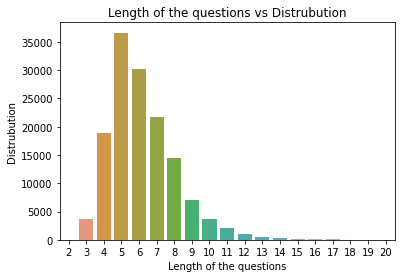

In [37]:
sns.countplot(data["question"].apply(lambda x: len(x.split())).values)
plt.title("Length of the questions vs Distrubution")
plt.xlabel("Length of the questions")
plt.ylabel("Distrubution")
plt.show()

**QUESTION TYPE AND ANSWER**

In [38]:
temp = data
top_question = [x[0] for x in question_type_frequncy[:50]]
print(top_question)
top_aswers = [x[0] for x in answer_type_frequncy[:50]]
print(top_aswers)
temp = data[(data['question_type'].isin(top_question) | data['multiple_choice_answer'].isin(top_aswers))]

aggregations = {'question': 'count'}
temp = pd.DataFrame(temp.groupby(['question_type','multiple_choice_answer'],as_index= False).agg(aggregations))
temp = temp[temp['question']>=10]
temp = temp.pivot(index='question_type', columns='multiple_choice_answer', values='question')
#print(temp)

['how many', 'is the', 'what', 'what color is the', 'what is the', 'none of the above', 'is this', 'is this a', 'what is', 'what kind of', 'are the', 'is there a', 'what type of', 'what are the', 'is it', 'where is the', 'is there', 'what color are the', 'does the', 'is', 'are these', 'are there', 'what is the man', 'which', 'is the man', 'are', 'how', 'does this', 'how many people are', 'what is on the', 'what is in the', 'what does the', 'what is this', 'why', 'what are', 'are they', 'what color', 'do', 'are there any', 'what time', 'what sport is', 'what color is', 'is he', 'how many people are in', 'where are the', 'who is', 'what animal is', 'is the woman', 'is this an', 'do you']
['other', 'yes/no', 'number']


**QUESTION TYPE VS ANSWER**

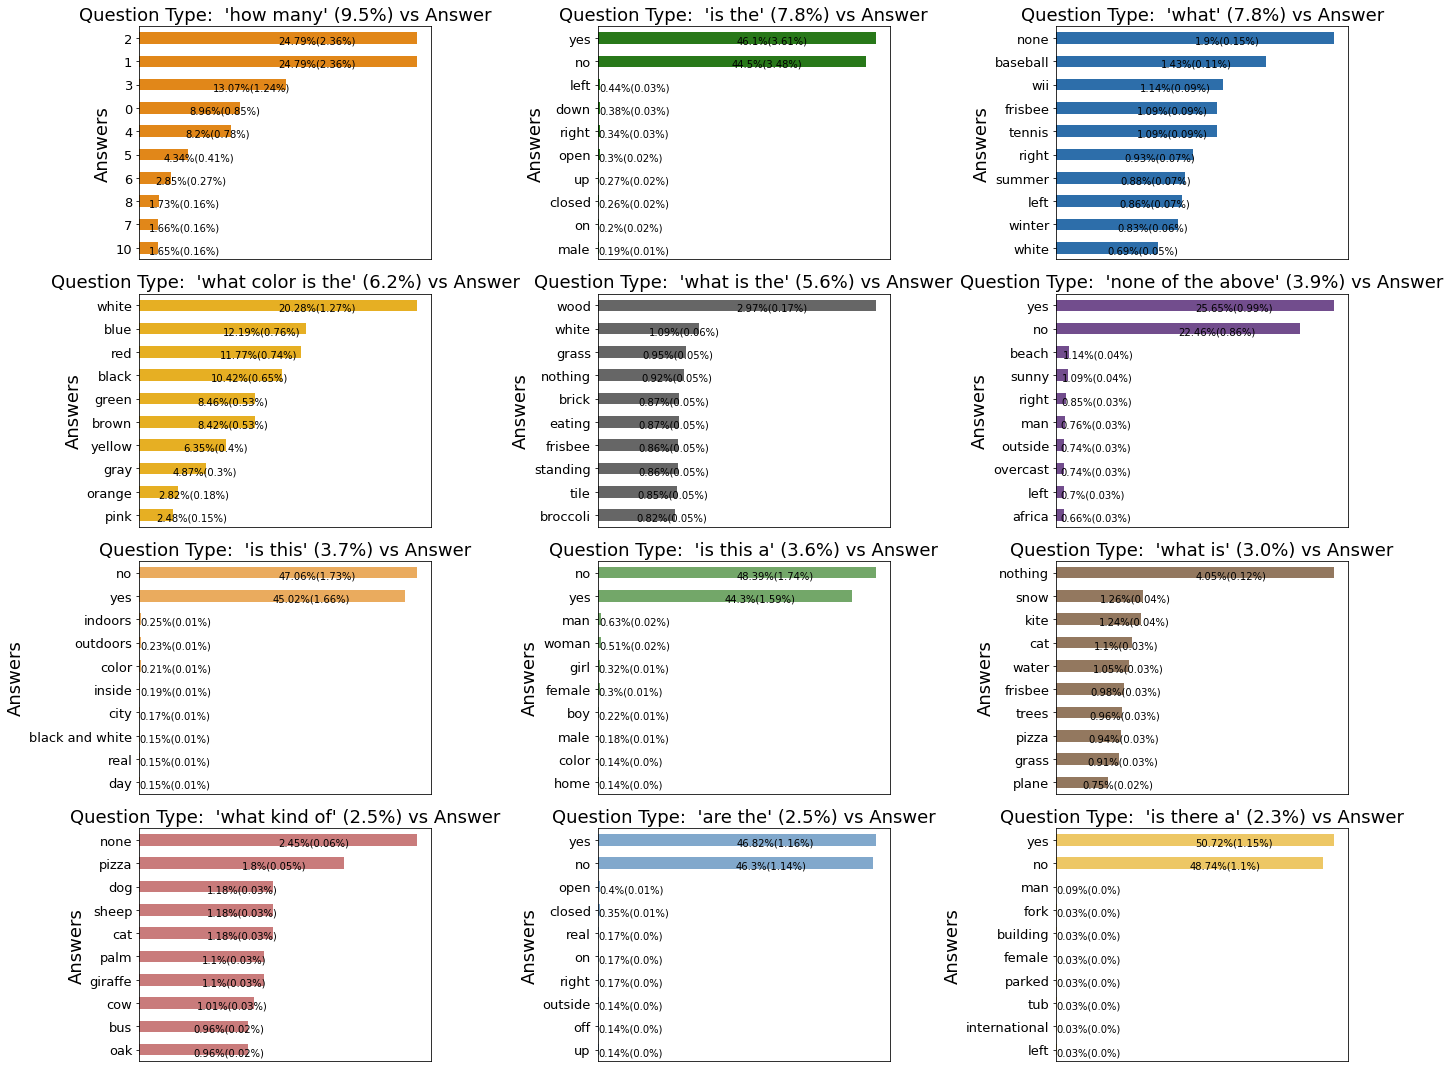

In [39]:
fig = plt.figure(figsize=(80,30))
fig.tight_layout() 
count = 1
colorCodes = [ "#E18719", "#287819", "#2D6EAA", "#E6AF23", "#666666","#724D8D", "#EAAB5E", "#73A769","#93785F",
              "#C97B7B", "#81A8CC", "#EDC765", "#858585","#957AA9", "#F3CFA3","#B4D0AF", "#BEADA0", "#E4BDBD", 
              "#ABC5DD", "#F4DB9C", "#A3A3A3"]

for _type,_ in question_type_frequncy[:12]:

    percentage = str(round((len(data[data['question_type']==_type])/len(data))*100,1))+'%'

    plt.subplot(4, 3, count)
    temp = data[data['question_type']==_type]
    ax = temp['multiple_choice_answer'].value_counts()[:10][::-1].plot(kind='barh', figsize=(20,15),color=colorCodes[count-1], fontsize=13)
    ax.set_alpha(0.8)   
    ax.set_title("Question Type:  '" + _type + "' (" + percentage + ") vs Answer" , fontsize=18)
    ax.set_ylabel("Answers", fontsize=18)
    ax.get_xaxis().set_visible(False)


    for i in ax.patches:
        ax.text(i.get_width()/2, i.get_y(), str(round((i.get_width()/len(temp))*100, 2))+'%' + "(" +
                str(round((i.get_width()/len(data))*100, 2))+'%' +")", fontsize=10,color='black')
        
    count += 1

fig.tight_layout()
plt.show()

**ANSWERS VS QUESTION TYPE**

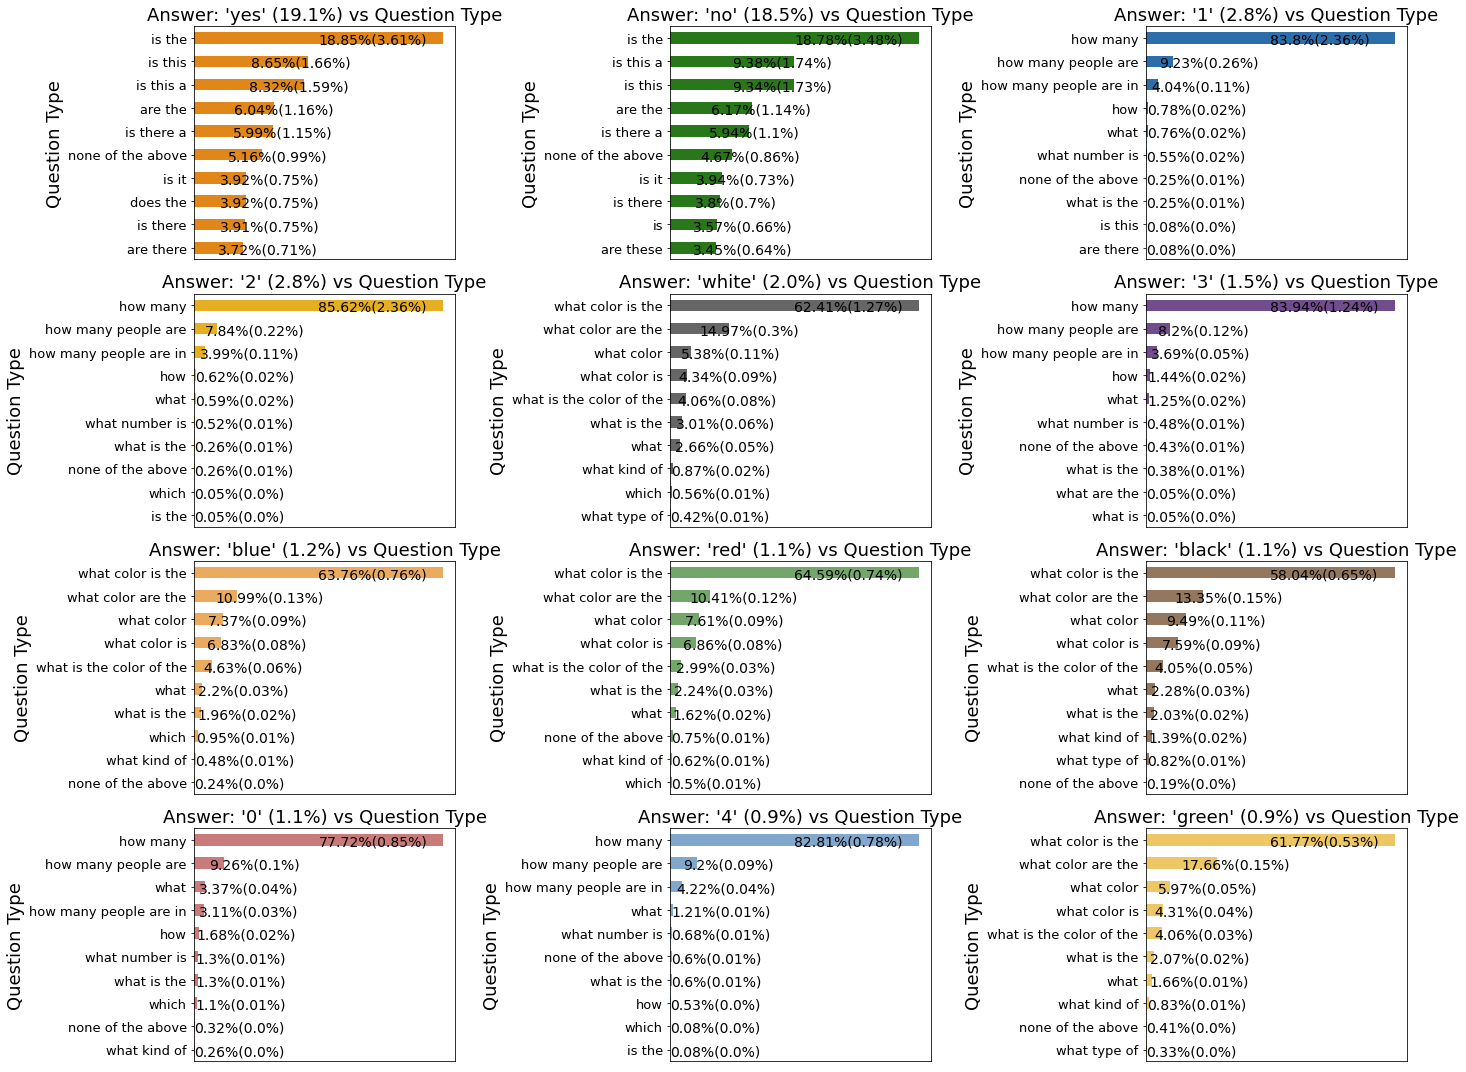

In [40]:
fig = plt.figure()
fig.tight_layout() 
count = 1

colorCodes = [ "#E18719", "#287819", "#2D6EAA", "#E6AF23", "#666666","#724D8D", "#EAAB5E", "#73A769","#93785F",
              "#C97B7B", "#81A8CC", "#EDC765", "#858585","#957AA9", "#F3CFA3","#B4D0AF", "#BEADA0", "#E4BDBD", 
              "#ABC5DD", "#F4DB9C", "#A3A3A3"]

answer_frequncy = sorted(list(getFrequnctDict(data,'multiple_choice_answer').items()),key = lambda x: x[1],reverse=True)

for _type,_ in answer_frequncy[:12]:

    percentage = str(round((len(data[data['multiple_choice_answer']==_type])/len(data))*100,1))+'%'

    plt.subplot(4, 3, count)
    temp = data[data['multiple_choice_answer']==_type]
    ax = temp['question_type'].value_counts()[:10][::-1].plot(kind='barh', figsize=(20,15),color=colorCodes[count-1], fontsize=13)
    ax.set_alpha(0.8)   
    ax.set_title("Answer: '" + _type + "' (" + percentage + ") vs Question Type" , fontsize=18)
    ax.set_ylabel("Question Type", fontsize=18)
    ax.get_xaxis().set_visible(False)

    for i in ax.patches:
        ax.text(i.get_width()/2, i.get_y(), str(round((i.get_width()/len(temp))*100, 2))+'%' + "(" +
                str(round((i.get_width()/len(data))*100, 2))+'%' +")", fontsize=14,color='black')
        
    count += 1

fig.tight_layout()
plt.show()

**CHECKING IF ACTUAL ANSWER IS SAME AS PERSONS ANSWERS**

In [41]:
def getPeopleAnswer(answers):
    answers_dict = {}
    score_dict = { 'yes' : 3, 'maybe' : 2, 'no' : 1 }
    for _answer in answers:
        score = score_dict[_answer['answer_confidence']]
        if answers_dict.get(_answer['answer'],-1) != -1 :
            answers_dict[_answer['answer']] += score
        else:
            answers_dict[_answer['answer']] = score

    return sorted(list(answers_dict.items()),key = lambda x: x[1],reverse=True)[0][0]

In [42]:
#data['derived_answer'] =  data["answers"].apply(lambda x: getPeopleAnswer(x))

In [43]:
#data[ data['derived_answer'] != data['multiple_choice_answer']]

In [44]:
!pwd

/content/train2014


In [45]:

dataDDirectory ='/content/drive/MyDrive/newresults'
os.chdir(dataDDirectory)
!pwd
data.to_csv(dataDDirectory + 'data.csv')

/content/drive/MyDrive/newresults


In [46]:
os.listdir(dataDDirectory)

['data',
 '.ipynb_checkpoints',
 'Models',
 'my_vqas_model',
 'myhdfff5.hdf5',
 'filenamert.pickle',
 'training.hdf5',
 'validation.hdf5',
 'VQAs_MODEL_WEIGHTS.hdf5']

**Modelling**

In [47]:
import warnings
warnings.filterwarnings("ignore")

import pickle
import os
import pandas as pd
import random as rn
import numpy as np
import tensorflow as tf
from google.colab import drive
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.regularizers import l1,l2
from tqdm import tqdm
import heapq
from sklearn.utils import shuffle
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


**Variables**

In [48]:
currentDirectory = "/content/drive/MyDrive/newresults/"
os.chdir(currentDirectory)
currentDirectory = ""
dataDirectory = currentDirectory + "data/"
#imageDirectory = dataDirectory + "train2014/"
imageDirectory = '/content/train2014/'
imageNumpyDirectory = dataDirectory + "train2014_Numpy" + ''

modelsDirectory = currentDirectory + "Models/"


img_width = 224
img_height = 224

BATCH_SIZE = 64
#BATCH_SIZE = 1
BUFFER_SIZE = 300

In [49]:
#len(os.listdir(imageNumpyDirectory))
data = pd.read_csv(dataDDirectory + 'data.csv')
X_train, X_val = train_test_split(data, test_size=0.2, random_state=42)

**Creating answer vectors**

In [50]:
contractions = { 
"ain't": "am not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because","could've": "could have","couldn't": "could not",
"couldn't've": "could not have","didn't": "did not","doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have",
"hasn't": "has not","haven't": "have not","he'd": "he would","he'd've": "he would have","he'll": "he will","he's": "he is","how'd": "how did",
"how'll": "how will","how's": "how is","i'd": "i would","i'll": "i will","i'm": "i am","i've": "i have","isn't": "is not","it'd": "it would",
"it'll": "it will","it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not",
"must've": "must have","mustn't": "must not","needn't": "need not","oughtn't": "ought not","shan't": "shall not","sha'n't": "shall not","she'd": "she would",
"she'll": "she will","she's": "she is","should've": "should have","shouldn't": "should not","that'd": "that would","that's": "that is","there'd": "there had",
"there's": "there is","they'd": "they would","they'll": "they will","they're": "they are","they've": "they have","wasn't": "was not","we'd": "we would",
"we'll": "we will","we're": "we are","we've": "we have","weren't": "were not","what'll": "what will","what're": "what are","what's": "what is",
"what've": "what have","where'd": "where did","where's": "where is","who'll": "who will","who's": "who is","won't": "will not","wouldn't": "would not",
"you'd": "you would","you'll": "you will","you're": "you are"
}

def preprocess_english(text):
    '''Given a text this function removes the punctuations and returns the remaining text string'''
    new_text = ""
    text = text.lower()
    i = 0
    for word in text.split():
      if i==0:
        new_text = contractions.get(word,word)
      else:
        new_text = new_text + " " + contractions.get(word,word)
      i += 1
    return new_text.replace("'s", '')

In [51]:
X_train['multiple_choice_answer'] = X_train['multiple_choice_answer'].apply(lambda x: preprocess_english(x))
X_val['multiple_choice_answer'] = X_val['multiple_choice_answer'].apply(lambda x: preprocess_english(x))

In [52]:
all_classes = X_train['multiple_choice_answer'].values
class_frequency = {}

for _cls in all_classes:
    if(class_frequency.get(_cls,-1)>0):
        class_frequency[_cls] += 1
    else:
        class_frequency[_cls] = 1

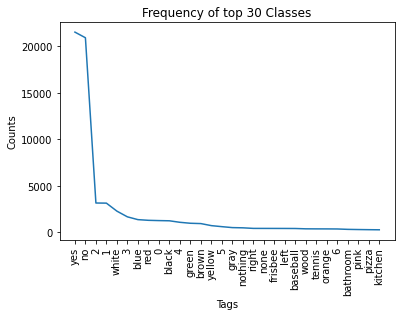

In [53]:
sort_class_frequency = sorted(list(class_frequency.items()),key = lambda x: x[1],reverse=True)   

plt.plot([x[1] for x in sort_class_frequency[:30]])
i=np.arange(30)
plt.title("Frequency of top 30 Classes")
plt.xlabel("Tags")
plt.ylabel("Counts")
plt.xticks(i,[x[0] for x in sort_class_frequency[:30]])
plt.xticks(rotation=90)
plt.show()

5 most frequent Classes covers 45.24% points
10 most frequent Classes covers 51.27% points
20 most frequent Classes covers 57.05% points
50 most frequent Classes covers 63.85% points
70 most frequent Classes covers 66.45% points
100 most frequent Classes covers 69.31% points
200 most frequent Classes covers 75.19% points
500 most frequent Classes covers 82.80% points
750 most frequent Classes covers 85.72% points
1000 most frequent Classes covers 87.58% points
2000 most frequent Classes covers 91.54% points
3000 most frequent Classes covers 93.58% points
5000 most frequent Classes covers 95.78% points


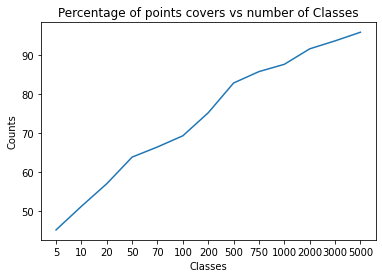

In [54]:
def getPercentageOfDataCoversGivenNumClasses(n_class, class_frequency, df):
    n_common_class = heapq.nlargest(n_class, class_frequency, key=class_frequency.get)
    count = 0
    for _class in df['multiple_choice_answer'].values:
        if(_class in n_common_class):
            count += 1

    return (count/len(df))*100
    
n_classes = [5,10,20,50,70,100,200,500,750,1000,2000,3000,5000]
percentage_cover = []
for i in n_classes:
    temp = getPercentageOfDataCoversGivenNumClasses(i,class_frequency,X_train)
    percentage_cover.append(temp)
    print("{} most frequent Classes covers {:.2f}% points".format(i,temp))


plt.plot(percentage_cover)
i=np.arange(len(percentage_cover))
plt.title("Percentage of points covers vs number of Classes")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.xticks(i,n_classes)
plt.show()

In [55]:
common_tags = heapq.nlargest(1000, class_frequency, key = class_frequency.get)
X_train['multiple_choice_answer'] =  X_train['multiple_choice_answer'].apply(lambda x: x if x in common_tags else '')

#removing question which has empty tags
X_train = X_train[X_train['multiple_choice_answer'].apply(lambda x: len(x)>0)]

In [56]:
label_encoder = LabelBinarizer()
answer_vector_train = label_encoder.fit_transform(X_train['multiple_choice_answer'].apply(lambda x: x).values)
answer_vector_val = label_encoder.transform(X_val['multiple_choice_answer'].apply(lambda x: x).values)

ans_vocab = {l: i for i, l in enumerate(label_encoder.classes_)}

print("Number of clasess: ", len(ans_vocab))
print("Shape of Answer Vectors in Train Data: ", answer_vector_train.shape)
print("Shape of Answer Vectors in Validation Data: ", answer_vector_val.shape)

Number of clasess:  1000
Shape of Answer Vectors in Train Data:  (98684, 1000)
Shape of Answer Vectors in Validation Data:  (28169, 1000)


**Creating Image features using VGG19**

In [57]:
import pickle
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers
import math
from tensorflow import keras
#from tensorflow.keras import layers

def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    print("img after channels shape")
    print(img.shape)
    img = tf.image.resize(img, (img_width, img_height))
    print("img after resize shape")
    print(img.shape)
    
    #img = tf.keras.applications.vgg19.preprocess_input(img)
    img = img * (1./255)
    return img, image_path


def Alex_Top():
  print("Toy ResNet model for CIFAR10")
  print("Layers generated for model")
  inputs = keras.Input(shape=(224, 224, 3), name="img")
  x = layers.Conv2D(32, 3, activation="relu")(inputs)
  x = layers.Conv2D(64, 3, activation="relu")(x)
  block_1_output = layers.MaxPooling2D(3)(x)

  x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
  x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
  block_2_output = layers.add([x, block_1_output])

  x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
  x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
  block_3_output = layers.add([x, block_2_output])

  x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(256, activation="relu")(x)
  x = layers.Dropout(0.5)(x)
  outputs = layers.Dense(10)(x)

  model = keras.Model(inputs, outputs, name="toy_resnet")
  print("More information about the model")
  model.summary()
  return model
  
    


    

def generateImageFeatures(images):
    model = Alex_Top()
    all_image_dict = {}
  
    img_ds = tf.data.Dataset.from_tensor_slices(images)
    img_ds = img_ds.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)
    
    for batch_img, batch_path in img_ds:
        batch_img_features = model(batch_img)
        #print(batch_img_features)

        for img_features, path in zip(batch_img_features, batch_path):
            image_path = path.numpy().decode("utf-8")
            print(image_path)
            
            
            image_path = image_path.replace(imageDirectory,'/content/drive/MyDrive/newresults/data'+'/'+'train2014_Numpy').replace('.jpg',"")
            print(image_path)
            np.save(image_path, img_features.numpy())
            all_image_dict[image_path] = img_features.numpy()
            print("Printing image features")
            #print(all_image_dict[image_path])
    
    with open('filenamert.pickle', 'wb') as handle:
        pickle.dump(all_image_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    return

!pwd
all_image_path = data['image_id'].apply(lambda x:  imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (x)).unique()

  


generateImageFeatures(all_image_path)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/newresults/data/train2014_NumpyCOCO_train2014_000000507580
Printing image features
/content/train2014/COCO_train2014_000000316113.jpg
/content/drive/MyDrive/newresults/data/train2014_NumpyCOCO_train2014_000000316113
Printing image features
/content/train2014/COCO_train2014_000000248674.jpg
/content/drive/MyDrive/newresults/data/train2014_NumpyCOCO_train2014_000000248674
Printing image features
/content/train2014/COCO_train2014_000000510525.jpg
/content/drive/MyDrive/newresults/data/train2014_NumpyCOCO_train2014_000000510525
Printing image features
/content/train2014/COCO_train2014_000000206454.jpg
/content/drive/MyDrive/newresults/data/train2014_NumpyCOCO_train2014_000000206454
Printing image features
/content/train2014/COCO_train2014_000000029909.jpg
/content/drive/MyDrive/newresults/data/train2014_NumpyCOCO_train2014_000000029909
Printing image features
/content/train2014/COCO_train2014_000000197324.jpg
/conten

In [58]:
'''model = keras.Sequential()
    model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(227, 227, 3)))

    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
    model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(86, activation="relu"))
    model.add(layers.Dropout(0.5))
    
    return model'''

'model = keras.Sequential()\n    model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), \n                        strides=(4, 4), activation="relu", \n                        input_shape=(227, 227, 3)))\n\n    model.add(layers.BatchNormalization())\n    model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))\n    model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), \n                        strides=(1, 1), activation="relu", \n                        padding="same"))\n    model.add(layers.BatchNormalization())\n    model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))\n    model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), \n                        strides=(1, 1), activation="relu", \n                        padding="same"))\n    model.add(layers.BatchNormalization())\n    model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), \n                        strides=(1, 1), activation="relu", \n                        padding="same"))\n    model.add(layers.Batch

In [59]:
print(imageDirectory)

/content/train2014/


In [60]:
image_paths_train = X_train['image_id'].apply(lambda x:  imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (x)).values
image_paths_val = X_val['image_id'].apply(lambda x:  imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (x)).values
#print(image_paths_train)
with open('filenamert.pickle','rb') as handle:
    all_image_dict = pickle.load(handle)

#with open('all_image_dict_new.pickle', 'rb') as handle:
    #all_image_dict_new = pickle.load(handle)

all_image_dict.update(all_image_dict)
#del all_image_dict_new

In [61]:
print(type(image_paths_train))

<class 'numpy.ndarray'>


**Creating question vectors**

In [62]:
def preprocess_english(text):
    '''Given a text this function removes the punctuations and returns the remaining text string'''
    new_text = "<start>"
    text = text.lower()
    for word in text.split():
      new_text = new_text + " " + contractions.get(word,word)
    new_text = new_text + " <end>"
    return new_text.replace("'s", '')

In [63]:
X_train['question'] = X_train['question'].apply(lambda x: preprocess_english(x))
X_val['question'] = X_val['question'].apply(lambda x: preprocess_english(x))

In [64]:
#tokenization
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token = "<unk>", filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(X_train['question'].values)
train_question_seqs = tokenizer.texts_to_sequences(X_train['question'].values)
val_question_seqs = tokenizer.texts_to_sequences(X_val['question'].values)

print("Number of words in tokenizer:", len(tokenizer.word_index))
ques_vocab = tokenizer.word_index

#Padding
#tokenizer.word_index['<pad>'] = 0
#tokenizer.index_word[0] = '<pad>'
question_vector_train = tf.keras.preprocessing.sequence.pad_sequences(train_question_seqs, padding='post')
question_vector_val = tf.keras.preprocessing.sequence.pad_sequences(val_question_seqs,padding='post',maxlen=question_vector_train.shape[1])

print("Shape of Question Vectors in Train Data: ", question_vector_train.shape)
print("Shape of Question Vectors in Validation Data: ", question_vector_val.shape)

Number of words in tokenizer: 8492
Shape of Question Vectors in Train Data:  (98684, 23)
Shape of Question Vectors in Validation Data:  (28169, 23)


**Creating dataset**

In [65]:
def get_imageTensor(img, ques):
    path = img.decode('utf-8').replace(imageDirectory,'/content/drive/MyDrive/newresults/data'+'/'+'train2014_Numpy').replace('.jpg',"") +'.npy'
    
    img_tensor = np.load(path)
    #img_tensor = all_image_dict[img.decode('utf-8')]
    
    return img_tensor, ques

In [66]:
def createDataset(image_paths,question_vector,answer_vector):
    dataset_input = tf.data.Dataset.from_tensor_slices((image_paths, question_vector.astype(np.float32)))
    dataset_output = tf.data.Dataset.from_tensor_slices((answer_vector.astype(np.float32)))
    # using map to load the numpy files in parallel
    dataset_input = dataset_input.map(lambda img, ques : tf.numpy_function(get_imageTensor, [img, ques], [tf.float32, tf.float32]),
                                      num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # shuffling and batching
    #dataset_input = dataset_input.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    dataset_input = dataset_input.batch(BATCH_SIZE)
    
    dataset_output = dataset_output.batch(BATCH_SIZE)#.repeat()
    
    dataset = tf.data.Dataset.zip((dataset_input, dataset_output))
    dataset = dataset.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

    return dataset

In [67]:
dataset_train = createDataset(image_paths_train, question_vector_train, answer_vector_train)
dataset_val = createDataset(image_paths_val, question_vector_val, answer_vector_val)
print(dataset_train)

<PrefetchDataset element_spec=((TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None)), TensorSpec(shape=(None, 1000), dtype=tf.float32, name=None))>


In [68]:
print(type(dataset_train))
print(dataset_train)

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
<PrefetchDataset element_spec=((TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None)), TensorSpec(shape=(None, 1000), dtype=tf.float32, name=None))>


In [69]:
hdf5_dict = {
    
    "train_images": image_paths_train,
    "train_ques": question_vector_train.astype(np.float32),
    "train_ans": answer_vector_train.astype(np.float32)
}

In [70]:
print(type(dataset_train))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [71]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
import h5py

In [73]:
!pwd

/content/drive/MyDrive/newresults


In [74]:
# create HDF5 file
with h5py.File('myhdfff5.hdf5', 'w') as hf:
    ls = list(hf.keys())
    print('list of dataset in this file: \n',ls)
    dt = h5py.special_dtype(vlen = np.dtype('float64'))
    dset_x_imgtrain = hf.create_dataset('imgg_train', data=image_paths_train)
    print(dset_x_imgtrain)
    dset_x_questrain = hf.create_dataset('quess_train', data=question_vector_train)
    dset_x_anstrain = hf.create_dataset('anss_train', data=answer_vector_train)
    '''for each in dset_x_anstrain:
      print(each)'''
    

list of dataset in this file: 
 []
<HDF5 dataset "imgg_train": shape (98684,), type "|O">


In [75]:
# create HDF5 file
with h5py.File('training.hdf5', 'w') as hf:
    ls = list(hf.keys())
    print('list of dataset in this file: \n',ls)
    dt = h5py.special_dtype(vlen = np.dtype('float64'))
    dset_x_imgtrain = hf.create_dataset('imgg_train', data=image_paths_train)
    print(dset_x_imgtrain)
    dset_x_questrain = hf.create_dataset('quess_train', data=question_vector_train)
    dset_x_anstrain = hf.create_dataset('anss_train', data=answer_vector_train)

list of dataset in this file: 
 []
<HDF5 dataset "imgg_train": shape (98684,), type "|O">


In [76]:
# create HDF5 file
with h5py.File('training.hdf5', 'r') as hf:
    ls = list(hf.keys())
    print('list of dataset in this file: \n',ls)
    img_data = hf.get('imgg_train')
    img_data1 = np.array(img_data)
    print(img_data1.shape)
    ques_data = hf.get('quess_train')
    ques_data1 = np.array(ques_data)
    print(ques_data1.shape)
    anss_data = hf.get('anss_train')
    anss_data1 = np.array(anss_data)
    print(anss_data1.shape)
    
    

list of dataset in this file: 
 ['anss_train', 'imgg_train', 'quess_train']
(98684,)
(98684, 23)
(98684, 1000)


In [77]:
# create HDF5 file
with h5py.File('validation.hdf5', 'w') as hf:
    ls = list(hf.keys())
    print('list of dataset in this file: \n',ls)
    dt = h5py.special_dtype(vlen = np.dtype('float64'))
    dset_x_imgval = hf.create_dataset('imgg_val', data=image_paths_val)
    print(dset_x_imgtrain)
    dset_x_quesval = hf.create_dataset('quess_val', data=question_vector_val)
    dset_x_ansval = hf.create_dataset('anss_val', data=answer_vector_val)

list of dataset in this file: 
 []
<Closed HDF5 dataset>


In [78]:
print(dset_x_anstrain)

<Closed HDF5 dataset>


**Baseline Model**

In [79]:
##fixing numpy RS
np.random.seed(42)

##fixing tensorflow RS
tf.random.set_seed(32)

##python RS
rn.seed(12)

In [80]:
'''def callBacksList():
    """
    returns list of callback's
    """
    filepath = modelsDirectory + ModelName + "/best.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'auto')
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', patience = 3)
    early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 4, verbose = 1)

    #directory for tensorboard to save evnts
    log_dir= modelsDirectory + "logs/fit/" + ModelName + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    os.makedirs(log_dir)

    print("TensorBoard Folder for this Execution",log_dir)#creating TensorBoard call back,this will write all events to given folder
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)

    history = tf.keras.callbacks.History()
    callbacks_list = [reduce_lr, early_stop, history, tensorboard_callback, checkpoint]
    return callbacks_list

def Build_BaseModel():
    image_input = tf.keras.layers.Input(shape=(7,7,512))
    question_input = tf.keras.layers.Input(shape=(question_vector_train.shape[1],))

    image_conv_layer1 = tf.keras.layers.Conv2D(filters = 4096, kernel_size = 7 , strides = 1, padding = "valid", activation = 'relu',
                                               kernel_initializer = tf.keras.initializers.he_normal(seed=45))(image_input)

    image_flatten = tf.keras.layers.Flatten()(image_conv_layer1)

    image_dense_1 = tf.keras.layers.Dense(4096, activation = tf.nn.relu, 
                                          kernel_initializer = tf.keras.initializers.he_uniform(seed=54))(image_flatten)
    
    image_dense_2 = tf.keras.layers.Dense(1024, activation = tf.nn.relu, 
                                          kernel_initializer = tf.keras.initializers.he_uniform(seed=32))(image_dense_1)


    # Input 2 Pathway
    question_emb = tf.keras.layers.Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim = 300 ,name = "Embedding_Layer",
                                             embeddings_initializer = tf.keras.initializers.RandomNormal(mean=0, stddev=1, seed=23))(question_input)

    question_lstm = tf.keras.layers.LSTM(1024, 
                                         kernel_initializer = tf.keras.initializers.glorot_uniform(seed=26),
                                         recurrent_initializer = tf.keras.initializers.orthogonal(seed=54),
                                         bias_initializer=tf.keras.initializers.zeros())(question_emb)

    question_flatten = tf.keras.layers.Flatten(name="Flatten_lstm")(question_lstm)

    
    image_question = tf.keras.layers.Multiply()([image_dense_2, question_flatten])


    image_question_dense_1 = tf.keras.layers.Dense(1000, activation = tf.nn.relu,
                                                    kernel_initializer = tf.keras.initializers.he_uniform(seed=19))(image_question)
    
    image_question_dense_2 = tf.keras.layers.Dense(1000, activation = tf.nn.relu, 
                                                   kernel_initializer = tf.keras.initializers.he_uniform(seed=28))(image_question_dense_1)

    output = tf.keras.layers.Dense(len(ans_vocab), activation=tf.nn.softmax, 
                                   kernel_initializer = tf.keras.initializers.glorot_normal(seed=19))(image_question_dense_2)

    # Create Model
    model = tf.keras.models.Model(inputs = [image_input, question_input], outputs = output)
    # Compile
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model'''

'def callBacksList():\n    """\n    returns list of callback\'s\n    """\n    filepath = modelsDirectory + ModelName + "/best.hdf5"\n    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = filepath, monitor = \'val_accuracy\', verbose = 1, save_best_only = True, mode = \'auto\')\n    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = \'val_accuracy\', patience = 3)\n    early_stop = tf.keras.callbacks.EarlyStopping(monitor = \'val_accuracy\', patience = 4, verbose = 1)\n\n    #directory for tensorboard to save evnts\n    log_dir= modelsDirectory + "logs/fit/" + ModelName + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")\n    os.makedirs(log_dir)\n\n    print("TensorBoard Folder for this Execution",log_dir)#creating TensorBoard call back,this will write all events to given folder\n    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)\n\n    history = tf.keras.callbacks.History()\n    callbacks_list = [reduce_lr, early_sto

In [81]:
def callBacksList():
    """
    returns list of callback's
    """
    filepath = modelsDirectory + ModelName + "/best.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'auto')
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', patience = 3)
    early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 4, verbose = 1)

    #directory for tensorboard to save evnts
    log_dir= modelsDirectory + "logs/fit/" + ModelName + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    os.makedirs(log_dir)

    print("TensorBoard Folder for this Execution",log_dir)#creating TensorBoard call back,this will write all events to given folder
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)

    history = tf.keras.callbacks.History()
    callbacks_list = [reduce_lr, early_stop, history, tensorboard_callback, checkpoint]
    return callbacks_list

def Build_BaseModel():
    #image_input = tf.keras.layers.Input(shape=(7,7,512))
    image_input = tf.keras.layers.Input(shape=(10,))
    print("image input shape")
    print(image_input.shape)
    question_input = tf.keras.layers.Input(shape=(question_vector_train.shape[0],))
    print("question input shape")
    print(question_input.shape)
    

    #image_conv_layer1 = tf.keras.layers.Conv2D(filters = 4096, kernel_size = 7 , strides = 1, padding = "valid",input_shape='image_input', activation = 'relu',
                                              #kernel_initializer = tf.keras.initializers.he_normal(seed=45))(image_input)

    #image_flatten = tf.keras.layers.Flatten()(image_conv_layer1)

    image_dense_1 = tf.keras.layers.Dense(64, activation = tf.nn.relu, 
                                          kernel_initializer = tf.keras.initializers.he_uniform(seed=54))(image_input)
                                         
    print("image dense 1 shape")
    print(image_dense_1.shape)                                      
    
    #image_dense_2 = tf.keras.layers.Dense(1024, activation = tf.nn.relu, 
                                          #kernel_initializer = tf.keras.initializers.he_uniform(seed=32))(image_dense_1)
    img_res = tf.reshape(image_dense_1,shape=[-1,4096]) 
    print("image dense 2 shape")
    #print(image_dense_2.shape)

    # Input 2 Pathway
    question_emb = tf.keras.layers.Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim = 300 ,name = "Embedding_Layer",
                                             embeddings_initializer = tf.keras.initializers.RandomNormal(mean=0, stddev=1, seed=23))(question_input)
    print("question emb shape")
    print(question_emb.shape)                                         

    question_lstm = tf.keras.layers.LSTM(1024, 
                                         kernel_initializer = tf.keras.initializers.glorot_uniform(seed=26),
                                         recurrent_initializer = tf.keras.initializers.orthogonal(seed=54),
                                         bias_initializer=tf.keras.initializers.zeros())(question_emb)
                                         
    print("question lstm shape")
    print(question_lstm.shape)
    question_flatten = tf.keras.layers.Flatten(name="Flatten_lstm")(question_lstm)
    
    print("question_flatten shape")
    print(question_flatten.shape)
    ques_res = tf.reshape(question_flatten,shape=[-1,4096]) 
    #image_question = tf.keras.layers.Multiply()([img_res, ques_res],1)
    image_question = tf.concat([image_dense_1,question_flatten],axis=1)
    print("image_question shape")
    print(image_question.shape)

    #image_question_dense_1 = tf.keras.layers.Dense(1024, activation = tf.nn.relu,
                                                   # kernel_initializer = tf.keras.initializers.he_uniform(seed=19))(image_question)
    print("image question shape")
    #print(image_question_dense_1.shape) 
    #image_question_flat = tf.reshape(image_question,shape=[-1,4096]) 
    '''print("image_question_flat shape")
    print(image_question_flat.shape)'''                                             
    
    image_question_dense_2 = tf.keras.layers.Dense(1024, activation = tf.nn.relu, 
                                                   kernel_initializer = tf.keras.initializers.he_uniform(seed=28))(image_question)

    print("image_question_dense_2.shape") 
    print(image_question_dense_2.shape)                                               

    output = tf.keras.layers.Dense(len(ans_vocab), activation=tf.nn.softmax, 
                                   kernel_initializer = tf.keras.initializers.glorot_normal(seed=19))(image_question_dense_2)
    print("output shape")
    print(output[0].shape)

    # Create Model
    modelc = tf.keras.models.Model(inputs = [image_input, question_input], outputs = output)
   # modelc = tf.keras.models.Model(inputs = [image_input, question_input], logits = output)
  
    # Compile
    modelc.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return modelc

In [82]:

l2_alpha = 0.001
ModelName = "BaselineModel"
modelb = Build_BaseModel()
modelb.summary()
model_vqa = modelb.save('VQAs_MODEL_WEIGHTS.hdf5')
mode_save = modelb.save('my_vqas_model')

#model.fit(train_ddata, epochs = 1, callbacks = callBacksList())
#model.fit(train_ddata, epochs = 1, validation_data = dataset_val, callbacks = callBacksList())

image input shape
(None, 10)
question input shape
(None, 98684)
image dense 1 shape
(None, 64)
image dense 2 shape
question emb shape
(None, 98684, 300)
question lstm shape
(None, 1024)
question_flatten shape
(None, 1024)
image_question shape
(None, 1088)
image question shape
image_question_dense_2.shape
(None, 1024)
output shape
(1000,)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 98684)]      0           []                               
                                                                                                  
 Embedding_Layer (Embedding)    (None, 98684, 300)   2547900     ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 10)]       

INFO:tensorflow:Assets written to: my_vqas_model/assets


INFO:tensorflow:Assets written to: my_vqas_model/assets


In [83]:
#modelb.fit(dataset_train, epochs = 20, callbacks = callBacksList())
modelb.fit(dataset_train, epochs = 20, validation_data = dataset_val, callbacks = callBacksList())
#model.fit(dataset_train, epochs = 2, validation_data = dataset_val, callbacks = callBacksList())

TensorBoard Folder for this Execution Models/logs/fit/BaselineModel/20220524-060228
Epoch 1/20
1542/1542 [==============================] - ETA: 0s - loss: 3.0653 - accuracy: 0.2742
Epoch 1: val_accuracy improved from -inf to 0.27761, saving model to Models/BaselineModel/best.hdf5
1542/1542 [==============================] - 201s 126ms/step - loss: 3.0653 - accuracy: 0.2742 - val_loss: 2.1401 - val_accuracy: 0.2776 - lr: 0.0010
Epoch 2/20
1542/1542 [==============================] - ETA: 0s - loss: 2.2794 - accuracy: 0.3266
Epoch 2: val_accuracy improved from 0.27761 to 0.29351, saving model to Models/BaselineModel/best.hdf5
1542/1542 [==============================] - 178s 115ms/step - loss: 2.2794 - accuracy: 0.3266 - val_loss: 1.9014 - val_accuracy: 0.2935 - lr: 0.0010
Epoch 3/20
1542/1542 [==============================] - ETA: 0s - loss: 2.0024 - accuracy: 0.3598
Epoch 3: val_accuracy improved from 0.29351 to 0.30605, saving model to Models/BaselineModel/best.hdf5
1542/1542 [=====

In [84]:
recons_model = tf.keras.models.load_model('/content/drive/MyDrive/newresults/my_vqas_model')

In [85]:
recons_model.load_weights('/content/drive/MyDrive/newresults/VQAs_MODEL_WEIGHTS.hdf5')
#recons_model.evaluate(dataset_val)

In [86]:
'''%load_ext tensorboard
%tensorboard --logdir Models/logs/fit/BaselineModel'''

'%load_ext tensorboard\n%tensorboard --logdir Models/logs/fit/BaselineModel'

**TESTING**

Toy ResNet model for CIFAR10
Layers generated for model
More information about the model
Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 222, 222, 32  896         ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 conv2d_8 (Conv2D)              (None, 220, 220, 64  18496       ['conv2d_7[0][0]']               


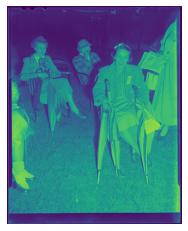

Question : what does the dress wearer carry?
Actual Answer:  umbrella
Top Predicted answers:  [('sandals', 0.2115424), ('ceramic', 0.19288261), ('england', 0.18819347), ('asia', 0.1838653), ('paper', 0.17807244)]
******************************************************************************************************************************************************
img after channels shape
(426, 640, 3)
img after resize shape
(224, 224, 3)


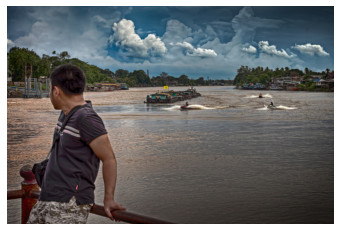

Question : what time of day is this?
Actual Answer:  afternoon
Top Predicted answers:  [('sandals', 0.21170008), ('ceramic', 0.1930091), ('england', 0.18825358), ('asia', 0.18424314), ('paper', 0.17795022)]
******************************************************************************************************************************************************
img after channels shape
(480, 640, 3)
img after resize shape
(224, 224, 3)


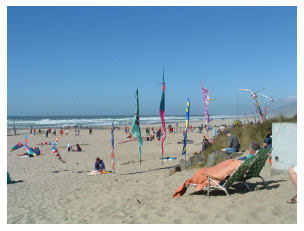

Question : is this outdoors?
Actual Answer:  yes
Top Predicted answers:  [('sandals', 0.21152769), ('ceramic', 0.19279979), ('england', 0.18762544), ('asia', 0.18286532), ('paper', 0.17847621)]
******************************************************************************************************************************************************


In [87]:
#model.load_weights(modelsDirectory + ModelName + "/best.hdf5")
test_idx = np.random.randint(len(X_val), size = 3)
model_vgg = Alex_Top()
k = 5

for idx in test_idx:
    test_image_id = X_val['image_id'].values[idx]
    test_question = X_val['question'].values[idx]
    actual_answer = X_val['multiple_choice_answer'].values[idx]
    test_image_path = imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (test_image_id)

    test_image_features = model_vgg(tf.expand_dims(load_image(test_image_path)[0], 0))
    test_question_features = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([test_question]),padding='post',
                                                                           maxlen=question_vector_train.shape[0])
    y_pred = recons_model.predict([test_image_features,test_question_features])

    class_indices = tf.math.top_k(y_pred,k=k).indices.numpy()
    percentages = tf.math.top_k(y_pred,k=k).values.numpy()[0] * 100
    predictions = []
    for idx,i in enumerate(class_indices[0]):
        classes = np.zeros((1,1000))
        classes[0][i] = 1
        predictions.append((label_encoder.inverse_transform(classes)[0],percentages[idx]))

    img=mpimg.imread(test_image_path)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

    print("Question :", test_question.replace("<start> ","").replace(" <end>",""))
    print("Actual Answer: ", actual_answer)
    print("Top Predicted answers: ",predictions)
    print("*"*150)